In [1]:
!pip install transformers
!pip install torch
!pip install pandas
!pip install matplotlib
!pip install gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.bin.gz
!gunzip cc.de.300.bin.gz

--2025-03-27 08:22:42--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.126, 18.238.176.115, 18.238.176.19, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4496980947 (4.2G) [application/octet-stream]
Saving to: ‘cc.de.300.bin.gz’

cc.de.300.bin.gz    100%[===================>]   4.19G  37.2MB/s    in 46s     

2025-03-27 08:23:28 (93.0 MB/s) - ‘cc.de.300.bin.gz’ saved [4496980947/4496980947]



In [3]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313486 sha256=6a5b5e846731c2e3db5f92bbf92f28d19e0f8e8b3ee0ed608c4047582a615c43
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [4]:
#load models.
from transformers import pipeline
import fasttext

#Multilingual BERT Model.
sentiment_model_bert = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

#Huggingface BERT Model.
sentiment_model_hf = pipeline("sentiment-analysis", model="oliverguhr/german-sentiment-bert")

#FastText Model.
ft_model = fasttext.load_model('cc.de.300.bin')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [5]:
import numpy as np

In [6]:
def get_ft_vector(text, model):
    words = text.lower().split()
    vectors = []
    for w in words:
        try:
            vectors.append(model.get_word_vector(w))
        except:
            continue
    if not vectors:
        return np.zeros(model.get_dimension())
    return np.mean(vectors, axis=0)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
import pandas as pd
import gdown

#filmstarts dataset.

reviews_file_id = "17l-LzyTfB_1FlIpQDAlV2a0Yestyu-CI"
labeled_file_id = "12t-EeIEeMq1tdQRkYbP6XFohhdAHIh0o"

reviews_file_path = "reviews.csv"
labeled_file_path = "labels.csv"

gdown.download(f"https://drive.google.com/uc?id={reviews_file_id}", reviews_file_path, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={labeled_file_id}", labeled_file_path, quiet=False)

reviews_df = pd.read_csv(reviews_file_path, sep='\t', header=None, names=['URL', 'Rating', 'Review'], on_bad_lines='skip')
labeled_df = pd.read_csv(labeled_file_path, sep='\t', header=None, names=['Label'])

labeled_df[['Sentiment', 'Score']] = labeled_df['Label'].str.split(' ', n=1, expand=True)
labeled_df['Score'] = pd.to_numeric(labeled_df['Score'], errors='coerce')
reviews_df = reviews_df.drop(columns=['Rating'])
combined_df = pd.concat([reviews_df, labeled_df], axis=1)
combined_df = combined_df.dropna(subset=['Review', 'Score'])
combined_df.head()


Downloading...
From: https://drive.google.com/uc?id=17l-LzyTfB_1FlIpQDAlV2a0Yestyu-CI
To: /content/reviews.csv
100%|██████████| 63.3M/63.3M [00:01<00:00, 35.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=12t-EeIEeMq1tdQRkYbP6XFohhdAHIh0o
To: /content/labels.csv
100%|██████████| 1.56M/1.56M [00:00<00:00, 16.2MB/s]


,URL,Review,Label,Sentiment,Score
0,http://www.filmstarts.de/kritiken/27070.html,Der Herr der Ringe - Die Gefährten ist für mic...,__label__neutral 5.0,__label__neutral,5.0
1,http://www.filmstarts.de/kritiken/27070.html,"Ein Ring sie zu knechten, Sie alle zu finden, ...",__label__neutral 5.0,__label__neutral,5.0
2,http://www.filmstarts.de/kritiken/27070.html,Der Herr der Ringe - Die Gefährten <> der best...,__label__neutral 5.0,__label__neutral,5.0
3,http://www.filmstarts.de/kritiken/27070.html,Was Peter Jackson hier erschaffen hat..ist ein...,__label__neutral 5.0,__label__neutral,5.0
4,http://www.filmstarts.de/kritiken/27070.html,ich habe es schon so oft gesehen ich gucke es ...,__label__neutral 5.0,__label__neutral,5.0


In [10]:
#pick samples.
sampled_df = combined_df.sample(1000, random_state=42)
sampled_df['Score'].value_counts()

balanced_df = combined_df.groupby('Score', group_keys=False).apply(lambda x: x.sample(n=200, random_state=42), include_groups=False)

texts = sampled_df['Review'].tolist()
labels = sampled_df['Score'].tolist()

#Vectorize and encode labels
X = np.array([get_ft_vector(t, ft_model) for t in texts])
le = LabelEncoder()
y = le.fit_transform(labels)

#train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import classification_report

#classification report for FastText model.
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00        23
         3.0       0.36      0.09      0.14        47
         4.0       0.31      0.70      0.43        60
         5.0       0.25      0.29      0.27        49

    accuracy                           0.30       200
   macro avg       0.16      0.18      0.14       200
weighted avg       0.24      0.30      0.23       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
#function for sentiment scores.

def get_sentiment_score_ft(text):
    vec = get_ft_vector(text, ft_model).reshape(1, -1)
    pred = clf.predict(vec)
    return le.inverse_transform(pred)[0]

def get_sentiment_score_hf(review):
    try:
        result = sentiment_model_hf(review[:512])
        label = result[0]['label']
        if label == 'positive':
            return 5
        elif label == 'neutral':
            return 3
        else:
            return 1
    except:
        return None

def get_sentiment_score_bert(review):
    try:
        result = sentiment_model_bert(review[:512])
        stars = result[0]['label']
        score = int(stars[0])
        return score
    except:
        return None


In [13]:
!python -m spacy download de_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 19.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
from transformers import AutoTokenizer, AutoModel
import torch
import spacy
from sklearn.metrics.pairwise import cosine_similarity

tokenizer = AutoTokenizer.from_pretrained("bert-base-german-cased")
model = AutoModel.from_pretrained("bert-base-german-cased")
nlp = spacy.load("de_core_news_sm")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/485k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [15]:
#load modal particle chunk 0 retrieved from the filmstart dataset.
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Dataset/filmstarts/modal_particle_final_chunk0.json"

df_json = pd.read_json(file_path, encoding="utf-8")
df_json.head()

Mounted at /content/drive


,Review,Particle
0,Was Peter Jackson hier erschaffen hat..ist ein...,doch
1,ich habe es schon so oft gesehen ich gucke es ...,schon
2,ich habe es schon so oft gesehen ich gucke es ...,mal
3,Eigentlich nur ganz kurz: wer Herr der Ringe n...,eigentlich
4,Es ist halt ein Film. In der extended Edition ...,halt


In [16]:
df_json['Particle'].value_counts()

,count
Particle,
schon,3539
wirklich,3529
mal,2841
doch,1893
ja,1661
eigentlich,1324
eben,762
halt,216
ruhig,138


In [17]:
particles = df_json['Particle'].unique()

sampled_rows = []

for particle in particles:
    filtered = df_json[df_json['Particle'] == particle]
    sample_n = min(100, len(filtered))
    sampled = filtered.sample(sample_n, random_state=42)
    sampled_rows.append(sampled)

df_sampled = pd.concat(sampled_rows, ignore_index=True)

df_sampled['Particle'].value_counts()

,count
Particle,
doch,100
schon,100
mal,100
eigentlich,100
halt,100
eben,100
ja,100
wirklich,100
ruhig,100


In [18]:
df_sampled.head()

,Review,Particle
0,In der Tat grunzt Max die meiste Zeit wie ein ...,doch
1,Gone Girl - Das perfekte Opfer ist ein film be...,doch
2,Zombieland hat mir persönlich doch wirklich gu...,doch
3,"Rocky – ein Franchise, welches vielleicht wie ...",doch
4,"Einer der besten Filme, die ich den letzten Ja...",doch


In [21]:
import pandas as pd

particle_results = []

#sampling 100 sentences for each modal particles.
for particle in df_json['Particle'].unique():
    filtered_reviews = df_json[df_json['Particle'] == particle]

    sample_size = min(100, len(filtered_reviews))
    if sample_size == 0:
        continue

    sampled_reviews = filtered_reviews.sample(sample_size, random_state=42)

    hf_scores = sampled_reviews['Review'].apply(get_sentiment_score_hf)
    bert_scores = sampled_reviews['Review'].apply(get_sentiment_score_bert)
    ft_scores = sampled_reviews['Review'].apply(get_sentiment_score_ft)

    hf_mean = hf_scores.dropna().mean()
    bert_mean = bert_scores.dropna().mean()
    ft_mean = ft_scores.dropna().mean()

    particle_results.append({
        'Particle': particle,
        'HuggingFace Model Score': hf_mean,
        'BERT Multilingual Model Score': bert_mean,
        'FastText Model Score': ft_mean,
        'Sample Size': sample_size,
        'Reviews': sampled_reviews['Review'].tolist()
    })

results_df = pd.DataFrame(particle_results)
results_df

,Particle,HuggingFace Model Score,BERT Multilingual Model Score,FastText Model Score,Sample Size,Reviews
0,doch,3.02,3.42,4.15,100,[In der Tat grunzt Max die meiste Zeit wie ein...
1,schon,2.94,3.49,4.31,100,"[ein ruhiger film, knapp zwei stunden, keine s..."
2,mal,3.40,3.68,4.38,100,"[So ich muss mal was loswerden, an die ganzen ..."
3,eigentlich,3.10,3.51,4.16,100,"[Watchmen ist einer der besten Filme, die ich ..."
4,halt,3.12,3.42,4.34,100,[möchte mich inhaltlich zu diesem film nicht ä...
5,eben,3.14,3.41,4.16,100,[Wow! Ridley Scott zeigt Hollywood auch mit fa...
6,ja,2.64,3.36,4.29,100,[Ich konnte mich den vielen euphorischen Kriti...
7,wirklich,3.44,3.70,4.38,100,[Ein wirklich klasse Film. Echt tolle Geschich...
8,ruhig,3.58,3.63,4.13,100,"[Ich war versucht, dem Film die volle Punktzah..."


In [22]:
#remove modal particles from the original sentence.

def remove_particle_from_review(review, particle):
    return review.replace(particle, '').replace(particle.capitalize(), '').strip()

In [26]:
#finding delta

df_with_deltas = results_df.copy()

expanded_rows = []
for _, row in results_df.iterrows():
    for review in row['Reviews']:
        expanded_rows.append({
            'Particle': row['Particle'],
            'Review': review
        })

df_expanded = pd.DataFrame(expanded_rows)

# Score_b for particle removed sentences
df_with_deltas['Score_b_hf'] = df_expanded.apply(
    lambda row: get_sentiment_score_hf(remove_particle_from_review(row['Review'], row['Particle'])),
    axis=1
)

df_with_deltas['Score_b_bert'] = df_expanded.apply(
    lambda row: get_sentiment_score_bert(remove_particle_from_review(row['Review'], row['Particle'])),
    axis=1
)

df_with_deltas['Score_b_ft'] = df_expanded.apply(
    lambda row: get_sentiment_score_ft(remove_particle_from_review(row['Review'], row['Particle'])),
    axis=1
)

# delta = b-a
df_with_deltas['Delta_hf'] = df_with_deltas['Score_b_hf'] - df_with_deltas['HuggingFace Model Score']
df_with_deltas['Delta_bert'] = df_with_deltas['Score_b_bert'] - df_with_deltas['BERT Multilingual Model Score']
df_with_deltas['Delta_ft'] = df_with_deltas['Score_b_ft'] - df_with_deltas['FastText Model Score']

df_with_deltas.head()

,Particle,HuggingFace Model Score,BERT Multilingual Model Score,FastText Model Score,Sample Size,Reviews,Score_b_hf,Score_b_bert,Score_b_ft,Delta_hf,Delta_bert,Delta_ft
0,doch,3.02,3.42,4.15,100,[In der Tat grunzt Max die meiste Zeit wie ein...,5,3,4.0,1.98,-0.42,-0.15
1,schon,2.94,3.49,4.31,100,"[ein ruhiger film, knapp zwei stunden, keine s...",5,4,5.0,2.06,0.51,0.69
2,mal,3.40,3.68,4.38,100,"[So ich muss mal was loswerden, an die ganzen ...",5,5,4.0,1.60,1.32,-0.38
3,eigentlich,3.10,3.51,4.16,100,"[Watchmen ist einer der besten Filme, die ich ...",1,4,4.0,-2.10,0.49,-0.16
4,halt,3.12,3.42,4.34,100,[möchte mich inhaltlich zu diesem film nicht ä...,5,5,4.0,1.88,1.58,-0.34


In [27]:
df_with_deltas

,Particle,HuggingFace Model Score,BERT Multilingual Model Score,FastText Model Score,Sample Size,Reviews,Score_b_hf,Score_b_bert,Score_b_ft,Delta_hf,Delta_bert,Delta_ft
0,doch,3.02,3.42,4.15,100,[In der Tat grunzt Max die meiste Zeit wie ein...,5,3,4.0,1.98,-0.42,-0.15
1,schon,2.94,3.49,4.31,100,"[ein ruhiger film, knapp zwei stunden, keine s...",5,4,5.0,2.06,0.51,0.69
2,mal,3.40,3.68,4.38,100,"[So ich muss mal was loswerden, an die ganzen ...",5,5,4.0,1.60,1.32,-0.38
3,eigentlich,3.10,3.51,4.16,100,"[Watchmen ist einer der besten Filme, die ich ...",1,4,4.0,-2.10,0.49,-0.16
4,halt,3.12,3.42,4.34,100,[möchte mich inhaltlich zu diesem film nicht ä...,5,5,4.0,1.88,1.58,-0.34
5,eben,3.14,3.41,4.16,100,[Wow! Ridley Scott zeigt Hollywood auch mit fa...,5,2,5.0,1.86,-1.41,0.84
6,ja,2.64,3.36,4.29,100,[Ich konnte mich den vielen euphorischen Kriti...,5,3,5.0,2.36,-0.36,0.71
7,wirklich,3.44,3.70,4.38,100,[Ein wirklich klasse Film. Echt tolle Geschich...,1,2,4.0,-2.44,-1.70,-0.38
8,ruhig,3.58,3.63,4.13,100,"[Ich war versucht, dem Film die volle Punktzah...",5,3,4.0,1.42,-0.63,-0.13


In [28]:
delta_subset = df_with_deltas[['Particle', 'Delta_hf', 'Delta_bert', 'Delta_ft']]
print(delta_subset)

     Particle  Delta_hf  Delta_bert  Delta_ft
0        doch      1.98       -0.42     -0.15
1       schon      2.06        0.51      0.69
2         mal      1.60        1.32     -0.38
3  eigentlich     -2.10        0.49     -0.16
4        halt      1.88        1.58     -0.34
5        eben      1.86       -1.41      0.84
6          ja      2.36       -0.36      0.71
7    wirklich     -2.44       -1.70     -0.38
8       ruhig      1.42       -0.63     -0.13


In [29]:
previous_study_delta = [0.3185, 0.0269, 0.1065, -0.1214, -0.1571, -0.0143, 0.3721, 0.1929, 0.6071]

particles = df_with_deltas['Particle'].tolist()
delta_hf = df_with_deltas['Delta_hf'].tolist()
delta_bert = df_with_deltas['Delta_bert'].tolist()
delta_ft = df_with_deltas['Delta_ft'].tolist()

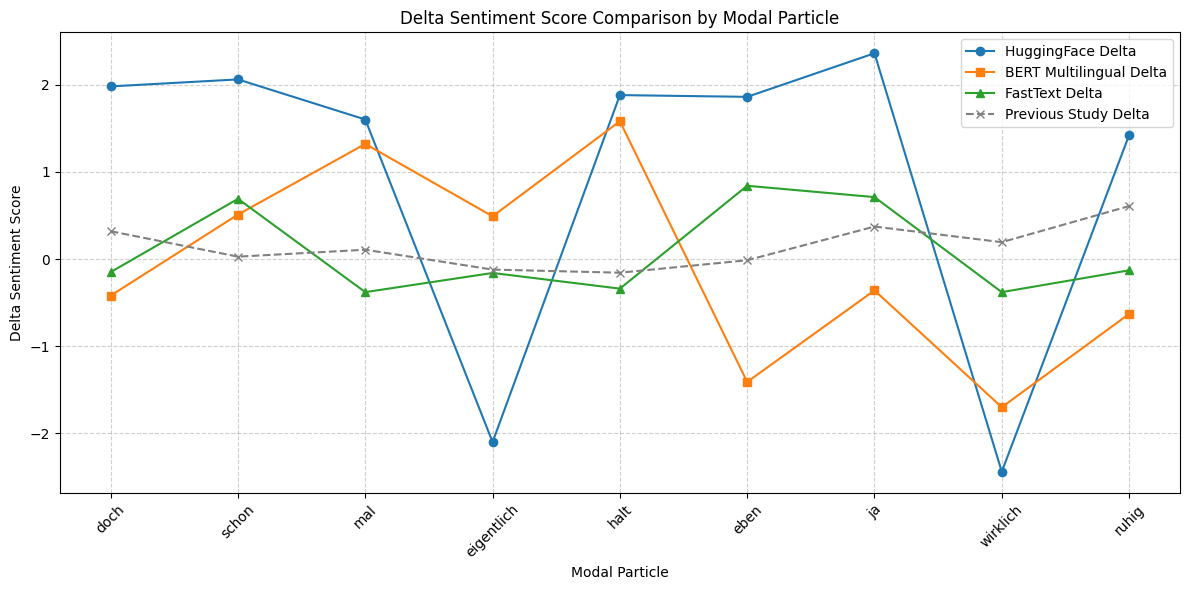

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(particles, delta_hf, label="HuggingFace Delta", marker='o')
plt.plot(particles, delta_bert, label="BERT Multilingual Delta", marker='s')
plt.plot(particles, delta_ft, label="FastText Delta", marker='^')
plt.plot(particles, previous_study_delta, label="Previous Study Delta", marker='x', linestyle='--', color='gray')

plt.title("Delta Sentiment Score Comparison by Modal Particle")
plt.xlabel("Modal Particle")
plt.ylabel("Delta Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
